### Import libraries using in Olist analysis:
- `pandas`
- `numpy`
- `seaborn`
- `matplotlib`
- `plotly`

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

### Analysis Brazilian E-Commerce Public Dataset by Olist
- #### Datasets
- `Olist Customers`
- `Olist Geolocation`
- `Olist Order_items`
- `Olist Order_pyments`
- `Olist Order_reviews`
- `Olist Orders`
- `Olist Products`
- `Olist sellers`
- `Olist Products_category_names`

### First analysis dataset : Olist Customers
- Load dataset

In [107]:
cus = pd.read_csv('olist_customers.csv')
cus.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


#### Handling data
- Missing values
- Duplicated

In [108]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [109]:
cus.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [110]:
cus.duplicated().sum()

np.int64(0)

##### After analyzing this dataset, there is no any missing values or duplicated

In [111]:
cus['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

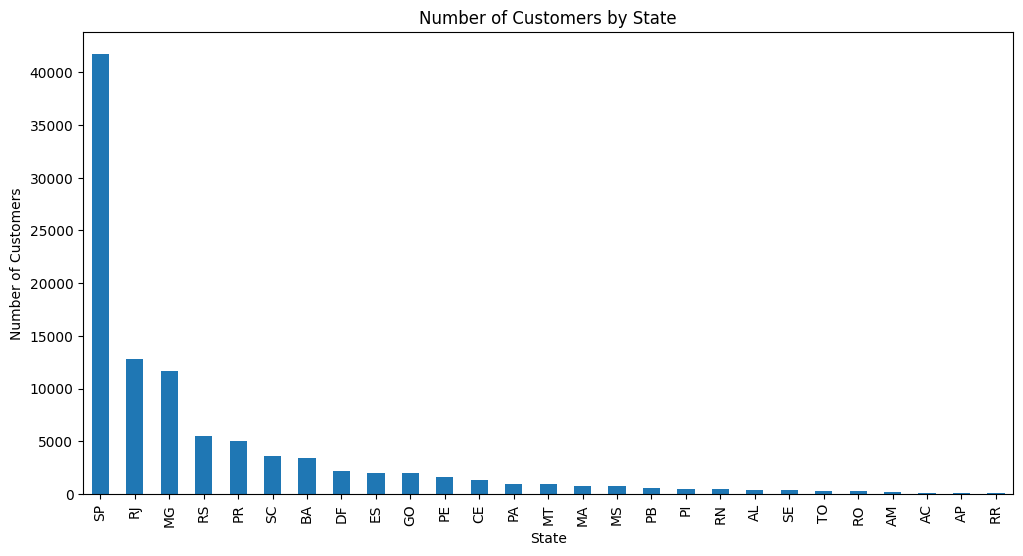

In [112]:
# Visualization: Number of Customers by State
cus['customer_state'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Number of Customers by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()

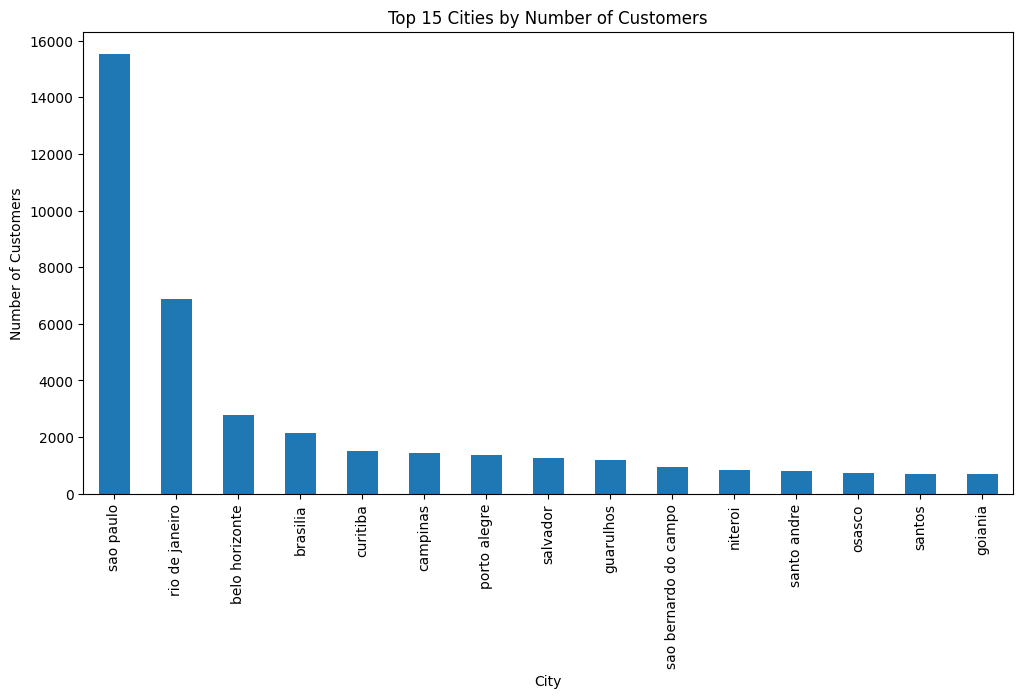

In [113]:
# Visualization Customers by city
top_cities = cus['customer_city'].value_counts().head(15)
top_cities.plot(kind='bar', figsize=(12,6))
plt.title('Top 15 Cities by Number of Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()

##### From this visualize we can see that most customers come from :
- `Sao paulo`
- `rio de janeiro`

In [114]:
# Know the total orders and actual customers
total_orders = cus['customer_id'].nunique()
unique_customers = cus['customer_unique_id'].nunique()
print(f"Total Orders: {total_orders}")
print(f"Actual Customers: {unique_customers}")

Total Orders: 99441
Actual Customers: 96096


In [115]:
# Know repeat customers and customers loyalty
customers_counts = cus['customer_unique_id'].value_counts()
repeat_customers = customers_counts[customers_counts > 1].count()
print(f"Repeat Customers: {repeat_customers}")

Repeat Customers: 2997


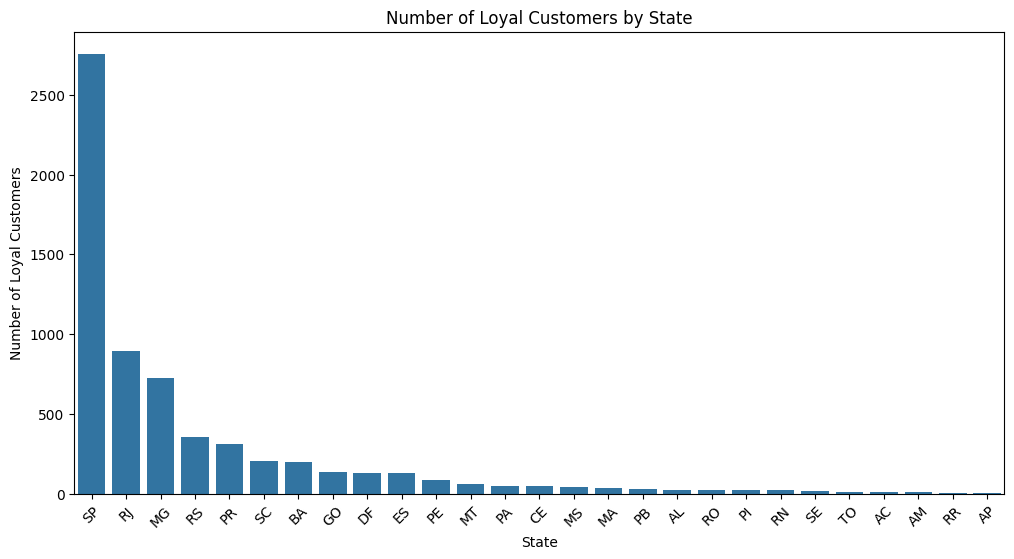

In [116]:
# More state have customers loyalty
loyal_customers = cus[cus['customer_unique_id'].isin(customers_counts[customers_counts > 1].index)]
loyalty_by_state = loyal_customers['customer_state'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=loyalty_by_state.index, y=loyalty_by_state.values)
plt.title('Number of Loyal Customers by State')
plt.xlabel('State')
plt.ylabel('Number of Loyal Customers')
plt.xticks(rotation=45)
plt.show()

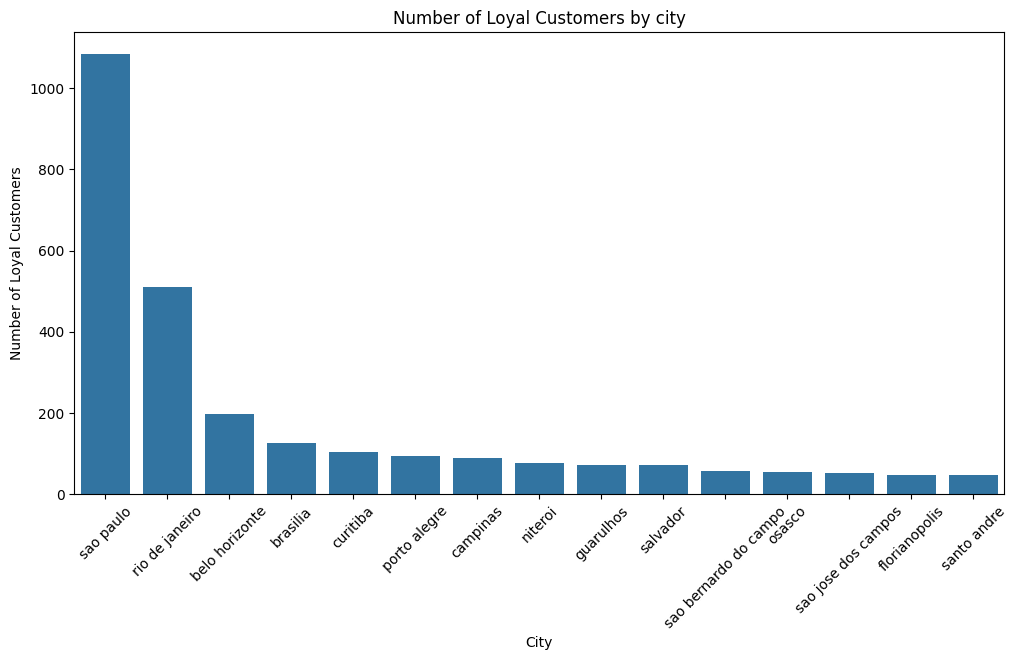

In [117]:
# More cities have customers loyalty
loyal_customers = cus[cus['customer_unique_id'].isin(customers_counts[customers_counts > 1].index)]
loyalty_by_state = loyal_customers['customer_city'].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=loyalty_by_state.index, y=loyalty_by_state.values)
plt.title('Number of Loyal Customers by city')
plt.xlabel('City')
plt.ylabel('Number of Loyal Customers')
plt.xticks(rotation=45)
plt.show()

In [118]:
cus.to_csv('customers.csv',index=False)

### During customer data analysis, I found that
- The 3 states with the most customers are : (SP, RJ, MG)
- Total Orders: 99441
- Actual Customers: 96096
- Number is Repeat Customers: 2997
- Most cities have loyal customers : 1- sao paulo 2- rio de janeiro

### ----------------------------------------------------------------------------------

##### Second : Analysis Olist Order_items

In [119]:
ord = pd.read_csv('olist_order_items.csv')
ord.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [120]:
ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [121]:
ord.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [122]:
ord.duplicated().sum()

np.int64(0)

In [123]:
ord['order_item_id'].nunique()

21

In [124]:
# Top 10 most frequent order_item_ids
ord['order_item_id'].value_counts(normalize=True).head(10)

order_item_id
1     0.875863
2     0.087022
3     0.020302
4     0.008566
5     0.004083
6     0.002273
7     0.000515
8     0.000320
9     0.000249
10    0.000222
Name: proportion, dtype: float64

In [125]:
# Top 10 Most Expensive Order Items
price_items = ord.groupby('order_item_id')['price'].mean().sort_values(ascending=False).head(10)
fig = px.bar(price_items, x=price_items.index,
            y=price_items.values, 
            title='Top 10 Most Expensive Order Items', 
            labels={'x':'Order Item ID', 'y':'Average Price'})
fig.update_layout( bargap=0.2,template='plotly_dark')
fig.show()

In [126]:
# Top 10 Most Expensive Freight Values by Order Item
freight_by_item = ord.groupby('order_item_id')['freight_value'].mean().sort_values(ascending=False).head(10)
fig = px.bar(freight_by_item, x=freight_by_item.index,
            y=freight_by_item.values, 
            title='Top 10 Most Expensive Freight Values by Order Item', 
            labels={'x':'Order Item ID', 'y':'Average Freight Value'})
fig.update_layout( bargap=0.2,template='plotly_dark')
fig.show()

#### Financial Analysis

In [127]:
# Price Distribution
fig = px.histogram(ord, x='price', nbins=20, 
            title='Price Distribution of Order Items', labels={'price':'Price'})
fig.update_layout(template='plotly_dark', bargap=0.01)
fig.show()

In [128]:
ord['price'].sum()

np.float64(13591643.7)

In [129]:
ord.drop(columns=['gmv'], inplace=True, errors='ignore')

In [130]:
# Freight to Price Ratio
ord['freight_to_price_ratio'] =round( (ord['freight_value'] / ord['price'])*100,2)
ord.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,freight_to_price_ratio
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,22.56
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,8.31


In [131]:
# Freight to Price Ratio by Order Item
grouped = ord.groupby('order_item_id')['freight_to_price_ratio'].mean().sort_values(ascending=False)

# Visualization
fig = px.bar(grouped, 
                x=grouped.index, 
                y='freight_to_price_ratio',
                title='Freight to Price Ratio by Order Item',  
                template='plotly_dark',
                color_continuous_scale=px.colors.sequential.Agsunset
            )

fig.show()

In [132]:
# Determine the High-Freight Threshold
# We define high freight as a value significantly above the average (e.g., Mean + 1.5 * Standard Deviation).
mean_freight = ord['freight_value'].mean()
std_freight = ord['freight_value'].std()

# Threshold calculation
high_freight_threshold = mean_freight + 1.5 * std_freight

print(f"Average Freight Value: {mean_freight:.2f}")
print(f"High Freight Threshold (Mean + 1.5 Std Dev): {high_freight_threshold:.2f}")

Average Freight Value: 19.99
High Freight Threshold (Mean + 1.5 Std Dev): 43.70


In [133]:
#Identify Products with consistently High Freight Costs
# Calculate the average freight cost for each product
product_freight_avg = ord.groupby('product_id')['freight_value'].mean()

# Select products whose average freight exceeds the calculated threshold
high_freight_products = product_freight_avg[product_freight_avg >= high_freight_threshold]
high_freight_product_ids = high_freight_products.index.tolist()

print(f"\nIdentified {len(high_freight_product_ids)} products as having high average freight costs.")


Identified 2112 products as having high average freight costs.


In [134]:
#Aggregate Commercial Performance for All Products
product_performance = ord.groupby('product_id').agg(
    total_revenue=('price', 'sum'),       # Total revenue generated by the product
    total_quantity=('order_id', 'count'), # Total units sold
    avg_price=('price', 'mean'),          # Average selling price per unit
    avg_freight=('freight_value', 'mean') # Average freight cost per unit
)
product_performance.head(5) 

,total_revenue,total_quantity,avg_price,avg_freight
product_id,,,,
00066f42aeeb9f3007548bb9d3f33c38,101.65,1,101.65,18.59
00088930e925c41fd95ebfe695fd2655,129.90,1,129.90,13.93
0009406fd7479715e4bef61dd91f2462,229.00,1,229.00,13.10
000b8f95fcb9e0096488278317764d19,117.80,2,58.90,19.60
000d9be29b5207b54e86aa1b1ac54872,199.00,1,199.00,19.27


In [135]:
# 4. Categorize Products into 'High Freight' and 'Standard/Low Freight'
product_performance['freight_category'] = np.where(
    product_performance.index.isin(high_freight_product_ids),
    'High Freight',
    'Standard/Low Freight'
)
product_performance.head(5)

,total_revenue,total_quantity,avg_price,avg_freight,freight_category
product_id,,,,,
00066f42aeeb9f3007548bb9d3f33c38,101.65,1,101.65,18.59,Standard/Low Freight
00088930e925c41fd95ebfe695fd2655,129.90,1,129.90,13.93,Standard/Low Freight
0009406fd7479715e4bef61dd91f2462,229.00,1,229.00,13.10,Standard/Low Freight
000b8f95fcb9e0096488278317764d19,117.80,2,58.90,19.60,Standard/Low Freight
000d9be29b5207b54e86aa1b1ac54872,199.00,1,199.00,19.27,Standard/Low Freight


In [136]:
#Analyze Performance Comparison 
freight_comparison = product_performance.groupby('freight_category').agg(
    Avg_Revenue_per_Product=('total_revenue', 'mean'),
    Avg_Quantity_per_Product=('total_quantity', 'mean'),
    Avg_Selling_Price=('avg_price', 'mean'),
    Avg_Freight_Cost=('avg_freight', 'mean')
)

print("\n=== Comparative Analysis of Product Performance ===\n")
print(freight_comparison)


=== Comparative Analysis of Product Performance ===

                      Avg_Revenue_per_Product  Avg_Quantity_per_Product  \
freight_category                                                          
High Freight                       940.061496                  2.258049   
Standard/Low Freight               376.349227                  3.498200   

                      Avg_Selling_Price  Avg_Freight_Cost  
freight_category                                           
High Freight                  472.29770         73.955112  
Standard/Low Freight          122.90829         17.589395  


In [137]:
ord.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,freight_to_price_ratio
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,22.56
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,8.31


In [138]:
# Convert shipping date to datetime
ord['shipping_limit_date'] = pd.to_datetime(ord['shipping_limit_date'])

In [139]:
ord.to_csv('order_items.csv',index=False)

#### Durning Analysis olist order dataset, i found that
- There 21 unique order items from 1 to 21 
- Top order item frequency is (1) :  98666
- Top Most Expensive Order Items {1:125, 8:120}
- Top Most Expensive Freight Values by Order Item {8:22.25, 1:20.20}
- Percentage freight value for som products is heigh, while these products are inexpensive
- Identified 2112 products as having high average freight costs.
-  I  Categorize Products into 'High Freight' and 'Standard/Low Freight'
- High Freight has => {Avg_Revenue:940, Avg_Quantity:2.25, Avg_Selling_Price:472.29, Avg_Freight_Cost:73.95}
- Standard/low Freight has => {Avg_Revenue:376, Avg_Quantity:3.5, Avg_Selling_Price:122.90, Avg_Freight_Cost:17.58}

#### -----------------------------------------------------------------------------------------------

### Third analysis olist order_payments

In [140]:
pay = pd.read_csv('olist_order_payments.csv')
pay.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [141]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [142]:
pay.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [143]:
pay.duplicated().sum()

np.int64(0)

#### Payment Type Analysis

In [144]:
# Group by payment type and count unique orders
# Knowing which payment type is most commonly used
Total_Orders = pay.groupby('payment_type')['order_id'].nunique().sort_values(ascending=False)
fig = px.bar(Total_Orders, x=Total_Orders.index,
            y=Total_Orders.values, title="Payment Type is most commonly used",
            template='plotly_dark'
            )
fig.show()


In [145]:
# Total payment value by payment type
Total_Revenue = pay.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)
fig = px.bar(Total_Revenue, x=Total_Revenue.index,
            y=Total_Revenue.values, title="Total Payment Value by Payment Type",
            template='plotly_dark'
            )
fig.show()

In [146]:
# Average Order Value (AOV) by Payment Type
AOV_by_Payment_Type = Total_Revenue / Total_Orders
AOV_by_Payment_Type

payment_type
credit_card    163.938098
boleto         145.034435
voucher         98.147147
debit_card     142.663475
not_defined      0.000000
dtype: float64

#### Analysis Installments & Liquidity

In [147]:
pay.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [148]:
pay['payment_installments'].nunique()

24

In [149]:
pay['payment_installments'].value_counts()

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64

In [150]:
# Number of Orders by Payment Installments
installments_order = pay.groupby('payment_installments')['order_id'].nunique().sort_values(ascending=False)
fig = px.bar(installments_order, x=installments_order.index,
            y=installments_order.values, title="Number of Orders by Payment Installments",
            template='plotly_dark'
            )
fig.show()

In [151]:
pay['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [152]:
pay['payment_sequential'].value_counts()

payment_sequential
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
17        6
19        6
18        6
16        6
20        4
21        4
22        3
24        2
25        2
26        2
23        2
27        1
28        1
29        1
Name: count, dtype: int64

In [153]:
#Determined the max sequential number of payments made for any order
max_sequential = pay.groupby('order_id')['payment_sequential'].max().reset_index()
max_sequential.rename(columns={'payment_sequential': 'Max_Sequential'}, inplace=True)

#Identify orders where more than one payment was recorded (Max_Sequential > 1)
multi_payment_orders = max_sequential[max_sequential['Max_Sequential'] > 1]

In [154]:
# Calculate the percentage of multi-payment orders
total_unique_orders = pay['order_id'].nunique()
multi_payment_count = len(multi_payment_orders)
multi_payment_percentage = (multi_payment_count / total_unique_orders) * 100

print(f"Total number of unique orders: {total_unique_orders}")
print(f"Number of orders with multiple payments: {multi_payment_count}")
print(f"Percentage of orders with multiple payments: {multi_payment_percentage:.2f}%")

Total number of unique orders: 99440
Number of orders with multiple payments: 3039
Percentage of orders with multiple payments: 3.06%


In [155]:
# Analyze the Average Total Value of these Multi-Payment Orders
# First, calculate the total value for every single order
order_total_value = pay.groupby('order_id')['payment_value'].sum().reset_index()

# Merge the multi-payment list with the order total values
multi_payment_values = pd.merge(multi_payment_orders, order_total_value, on='order_id')

# Calculate the average total value for the multi-payment group
avg_value_multi_payment = multi_payment_values['payment_value'].mean()
print(f"Average Total Order Value for Multi-Payment Orders: {avg_value_multi_payment:.2f}")

Average Total Order Value for Multi-Payment Orders: 166.29


In [156]:
pay.to_csv('payments.csv',index=False)

#### During analysis payment i found that:
- Credit-Card is most payment type common used.
- We have 24 unique installments
- We have more than 1 payment sequential this means that customers mad more payments for the same order_id
- Number of order with multiple payments = 3039 and percentage = 3.06%
- Avg total order value for multiple payments = 166.29

##### -----------------------------------------------------------------------------------

#### Fourth analysis olist order_reviews

In [157]:
rev = pd.read_csv('olist_order_reviews.csv')
rev.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [158]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [159]:
rev.duplicated().sum()

np.int64(0)

In [160]:
rev['review_answer_timestamp'] = pd.to_datetime(rev['review_answer_timestamp'])
rev['review_creation_date'] = pd.to_datetime(rev['review_creation_date'])

In [161]:
rev.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13


In [162]:
rev['review_score'].nunique()

5

In [163]:
# Review Score Distribution
review_counts = rev['review_score'].value_counts(normalize=True).mul(100).sort_index(ascending=False)
print('---------- Review Score Distribution (%) ----------')
print(review_counts.map('{:.2f}%'.format))

---------- Review Score Distribution (%) ----------
review_score
5    57.78%
4    19.29%
3     8.24%
2     3.18%
1    11.51%
Name: proportion, dtype: object


In [164]:
# General performance based on review scores
avg_score = rev['review_score'].mean()
print('----------- General performance based on review scores -----------   ')
print(f"\nAverage Review Score: {avg_score:.2f}")

----------- General performance based on review scores -----------   

Average Review Score: 4.09


In [165]:
# Create Loyalty Classification
rev['Loyalty_Classification'] = np.where(rev['review_score'] == 5, 'Promoter',
                    np.where(rev['review_score'].isin([3, 4]), 'Passive', 
                            'Detractor'))


In [166]:
rev.drop(columns=['detr_prom'], inplace=True, errors='ignore')

In [167]:
rev.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Loyalty_Classification
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,Passive
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,Promoter


In [168]:
# Visualize Loyalty Classification
fig = px.pie(rev, names='Loyalty_Classification',
            title='Customer Loyalty Classification based on Review Scores',
            template='plotly_dark'
            )
fig.update_traces(textinfo='percent+label', pull=[0,0.1])
fig.show()

##### Analysis Support Efficiency

In [169]:
# Calculate Response Time
rev['response_time'] = (rev['review_answer_timestamp'] - rev['review_creation_date'])
rev['response_time'].head(2)

0   0 days 21:46:59
1   1 days 03:05:13
Name: response_time, dtype: timedelta64[ns]

In [170]:
# Calculate Average Response Time in Hours
avg_response_hours = rev['response_time'].dt.total_seconds().mean() / 3600
print(f"Average Response Time to Reviews: {avg_response_hours:.2f} hours")

Average Response Time to Reviews: 75.58 hours


In [171]:
# Average Response Time by Loyalty Classification
response_loyalty = rev.groupby('Loyalty_Classification')['response_time'].mean().reset_index()
response_loyalty['response_time_hours'] = response_loyalty['response_time'].dt.total_seconds() / 3600
response_loyalty[['Loyalty_Classification', 'response_time_hours']]

fig = px.bar(response_loyalty, 
            x='Loyalty_Classification',
            y='response_time_hours',
            title='Average Response Time by Loyalty Classification',
            template='plotly_dark'
            )
fig.show()

In [172]:
rev.to_csv('reviews.csv',index=False)

#### During analysis olist order reviews i found that:
- Percentage of happy customers who were give review score (5) = 57.78%
- Percentage of customers who were give review score (1 or 2) = 14.69% this indicates that there is a problem
- Avg review score = 4.04 this indicates general performance, it's good
- Avg response time to review and and answer customers response = 75.58 hours (3.5 days)
- Customers are divided into 3 categories to determine loyalty : [Detractor , Passive , Promoter]

##### --------------------------------------------------------------------------

#### Fifth Analysis olist orders 

In [173]:
order = pd.read_csv('olist_orders.csv')
order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [174]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [175]:
order.duplicated().sum()

np.int64(0)

In [176]:
# Convert date columns to datetime
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'])
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'])
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'])
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])

In [177]:
order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [178]:
order['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [179]:
# Order Status Distribution
order['order_status'].value_counts().reset_index().rename(columns={'index':'order_status', 'order_status':'count'})

,count,count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


In [180]:
# Analysis cancellation rate
cancellation_rate = order[order['order_status'] == 'canceled'].shape[0] / order.shape[0] * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 0.63%


##### Operational Performance analysis

In [181]:
# Calculate Average Seller Preparation Time
order['seller_prep_time'] = (order['order_delivered_carrier_date'] - order['order_approved_at']).dt.total_seconds() / 86400
average_preparation_time = order['seller_prep_time'].mean()
print(f"Average Seller Preparation Time: {average_preparation_time:.2f} days")

Average Seller Preparation Time: 2.81 days


In [182]:
# Analyze Delivery Delay and SLA Adherence
order['delivery_delay'] = (order['order_delivered_customer_date'] - order['order_estimated_delivery_date']).dt.total_seconds() / 86400
order['on_time_delivery'] = np.where(order['delivery_delay'] <= 0, 'On Time', 'Delayed')


In [183]:
order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_prep_time,delivery_delay,on_time_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.366493,-7.107488,On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.462882,-5.355729,On Time


In [184]:
# Know Payment Processing Time
order['payment_processing_time'] = (order['order_approved_at'] - order['order_purchase_timestamp']).dt.total_seconds() / 3600
average_payment_processing_time = order['payment_processing_time'].mean()
print(f"Average Payment Processing Time: {average_payment_processing_time:.2f} hours")

Average Payment Processing Time: 10.42 hours


In [185]:
# Analyze Delay for ONLY Late Orders
# Filter for successfully delivered orders
delivered_orders = order[order['order_status'] == 'delivered'].copy()

# Calculate the difference between actual and estimated delivery date (in days)
# (Actual Delivery Date - Estimated Delivery Date)

delivered_orders['delivery_delay_days'] = (
    delivered_orders['order_delivered_customer_date'] - delivered_orders['order_estimated_delivery_date']
).dt.total_seconds().div(86400) 
# Filter only for genuinely late orders (Delay > 0)
late_orders = delivered_orders[delivered_orders['delivery_delay_days'] > 0].copy()

# 4. Calculate the average delay time for these late orders
avg_delay_for_late_orders = late_orders['delivery_delay_days'].mean()

# 5. Display the results
print("--------------- Analysis of Delay for ONLY Late Orders ---------------- ")
print(f"Total number of late orders (Actual Late Orders): {len(late_orders)}")
print(f"Average delay time for these late orders (in days): {avg_delay_for_late_orders:.2f} days")

--------------- Analysis of Delay for ONLY Late Orders ---------------- 
Total number of late orders (Actual Late Orders): 7826
Average delay time for these late orders (in days): 9.55 days


#### Efficiency Timing

In [186]:
# Seller Preparation Time for Late Orders
order['seller_prep_time'] = round((order['order_delivered_carrier_date'] - order['order_approved_at']).dt.total_seconds() / 86400, 2)
order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_prep_time,delivery_delay,on_time_delivery,payment_processing_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.37,-7.107488,On Time,0.178333
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.46,-5.355729,On Time,30.713889


In [187]:
# Seller Preparation Time by Order Status
seller_status = order.groupby('order_status')['seller_prep_time'].mean().reset_index().sort_values('seller_prep_time')
seller_status

,order_status,seller_prep_time
3,delivered,2.799064
1,canceled,3.225467
6,shipped,3.296079
0,approved,NaN
2,created,NaN
4,invoiced,NaN
5,processing,NaN
7,unavailable,NaN


In [188]:
# Carrier Transit Time Analysis
delivered_orders = order[order['order_status'] == 'delivered'].copy()

delivered_orders['carrier_transit_time_days'] = (
    delivered_orders['order_delivered_customer_date'] - delivered_orders['order_delivered_carrier_date']
).dt.total_seconds().div(86400)

avg_transit_time = delivered_orders['carrier_transit_time_days'].mean()

print("------------------ Carrier Transit Time Analysis ------------------------------")
print(f"Average transit time from carrier handover to customer delivery (in days): {avg_transit_time:.2f} days")

------------------ Carrier Transit Time Analysis ------------------------------
Average transit time from carrier handover to customer delivery (in days): 9.33 days


In [189]:
order.to_csv('orders.csv',index=False)

#### During analysis olist orders, I found that:
- Percentage of cancellation order = `0.63%` and percentage of delivered = `97.02%` this demonstrates the store's efficiency in delivery
- Avg payment processing time = `10.42` hours this means the order takes a fairly long time and may affect customer experience.
- Total number of late order = `7826` and avg delay time for these late order = `9.55` day this indicates a significant problem with fulfilling delivery requirements and this affects customer trust.
- I found that the orders that were cancelled had a longer processing time from the seller, and this may be one of the reasons that led to their cancellation.
- The avg number of days it takes a shipping company to transport a product from the seller to the customer = `9.33`
days, which is considered a long period in most markets and negatively affects customer expectations.

#### ---------------------------------------------------------------------------------------

#### Sixth analysis olist products 

In [190]:
pro = pd.read_csv('olist_products.csv')
pro.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [191]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [192]:
pro.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [193]:
pro.dropna(inplace=True)

In [194]:
pro.duplicated().sum()

np.int64(0)

In [195]:
pro.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [196]:
# Number of Unique Product Categories
pro['product_category_name'].nunique()

73

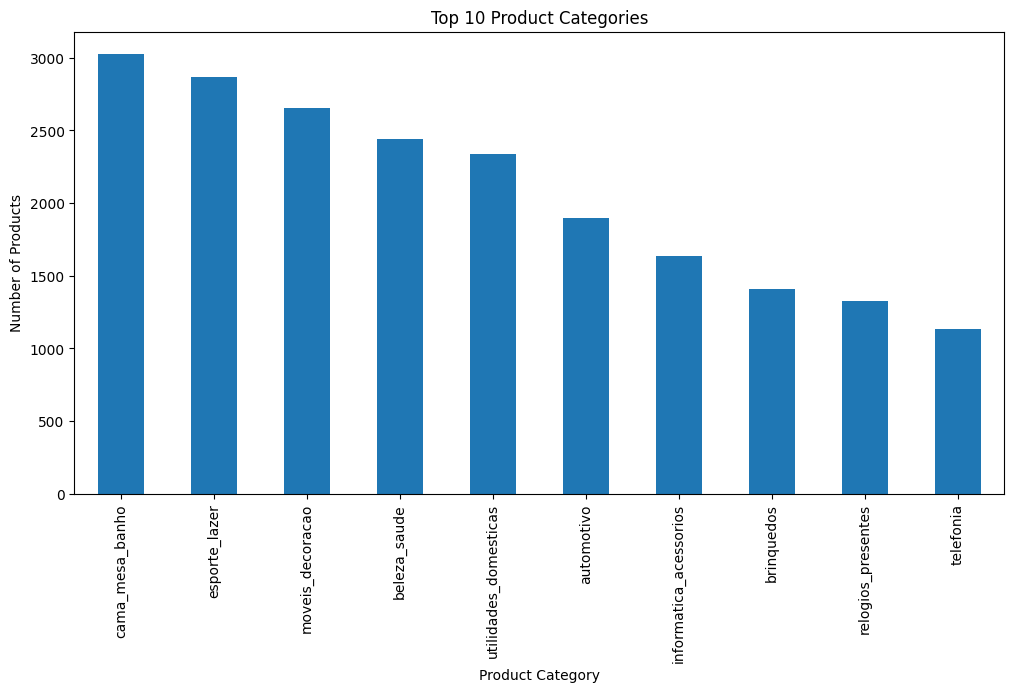

In [197]:
# Top 10 Product Categories
top_categories = pro['product_category_name'].value_counts().head(10)
top_categories.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.show()

In [198]:
# Calculate Product Volume
pro['product_volume_cm3'] = pro['product_length_cm'] * pro['product_height_cm'] * pro['product_width_cm']
pro.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0


In [199]:
# Logistics Pressure Analysis by Product Category
logistics_summary = pro.groupby('product_category_name').agg(
    Total_Products=('product_id', 'count'),
    avg_weight_kg=('product_weight_g', 'mean'),
    avg_volume_cm3=('product_volume_cm3', 'mean'),
).sort_values(by='avg_weight_kg', ascending=False).reset_index()

print("\n------------Top Categories by Average Weight (Logistics Pressure) ---------")
print(logistics_summary.head(5))


------------Top Categories by Average Weight (Logistics Pressure) ---------
                            product_category_name  Total_Products  \
0                       moveis_colchao_e_estofado              10   
1                               moveis_escritorio             309   
2  moveis_cozinha_area_de_servico_jantar_e_jardim              94   
3                                   moveis_quarto              45   
4                              eletrodomesticos_2              90   

   avg_weight_kg  avg_volume_cm3  
0   13190.000000    77244.300000  
1   12740.867314    75468.469256  
2   11598.563830    69406.095745  
3    9997.222222    51038.844444  
4    9913.333333    55476.311111  


In [200]:
# Content Quality Analysis by Product Category
content_summary = pro.groupby('product_category_name').agg(
    Avg_Description_Len=('product_description_lenght', 'mean'),
    Avg_Photos=('product_photos_qty', 'mean')
).sort_values(by='Avg_Photos', ascending=False)

print("\n=== Top Categories by Content Quality (Avg Photos & Description) ===")
print(content_summary.head(5))


=== Top Categories by Content Quality (Avg Photos & Description) ===
                                Avg_Description_Len  Avg_Photos
product_category_name                                          
fashion_calcados                         458.023121    5.121387
pc_gamer                                 997.666667    4.333333
casa_construcao                          855.155556    3.266667
fashion_underwear_e_moda_praia          1004.433962    3.264151
fashion_roupa_infanto_juvenil            350.800000    3.200000


In [201]:
pro.to_csv('products.csv',index=False)

#### -------------------------------------------------------------

#### Seventh analysis olist sellers

In [202]:
sel = pd.read_csv('olist_sellers.csv')
sel.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


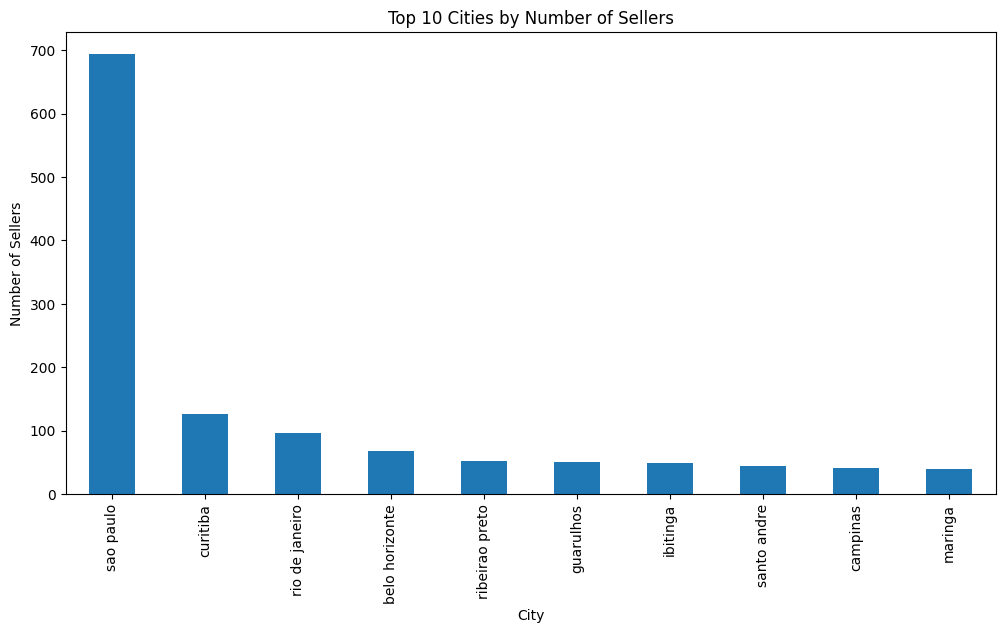

In [203]:
# Top 10 Cities by Number of Sellers
city_counts = sel['seller_city'].value_counts().head(10)
city_count = city_counts.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Cities by Number of Sellers')
plt.xlabel('City')
plt.ylabel('Number of Sellers')
plt.show()

In [204]:
# Number of Sellers by State
top_city = city_counts.index[0]
top_city_count = city_counts.iloc[0]
print(f"The city with the highest number of sellers is {top_city} with {top_city_count} sellers.")

The city with the highest number of sellers is sao paulo with 694 sellers.


In [205]:
# Number of Sellers by State
state_counts = sel['seller_state'].value_counts()
fig = px.bar(state_counts, x=state_counts.index,
            y=state_counts.values, title="Number of Sellers by State",
            template='plotly_dark'
            )
fig.show()

In [206]:
# Identify the State with the Highest Number of Sellers
top_state = state_counts.index[0]
top_state_count = state_counts.iloc[0]
print(f"The state with the highest number of sellers is {top_state} with {top_state_count} sellers.")

The state with the highest number of sellers is SP with 1849 sellers.


In [207]:
sel.to_csv('sellers.csv',index=False)

#### ----------------------------------------------------------------------

#### Eighth: analysis olist product category name translation

In [208]:
cat = pd.read_csv('product_category_name_translation.csv')
cat.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [209]:
cat.to_csv('category_name_eg.csv',index=False)